<a href="https://colab.research.google.com/github/ingenziart/sokrab/blob/main/audioexercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

In [ ]:
drive_path=('/content/drive/MyDrive')

In [ ]:
print(os.listdir(drive_path))

['Jenuzaji (2).docx', 'Jenuzaji (1).docx', 'Jenuzaji.docx', 'Getting started.pdf', 'Ingenzi swag', 'EXCEL.xlsx', 'aime.docx', 'AIME POWER POINT.pptx', 'CRACKING the · CODING INTERVIEW ( PDFDrive ).pdf', '_DSC0270[1].jpg', 'Mbabazi docs.pdf', 'Mbabazi docs.gdoc', 'Colab Notebooks', 'Exploratory_data_analysis_1 (1).ipynb', 'DataAcquisition_Zhang.ipynb', 'music (1)', 'music7']


In [ ]:
music_path=('/content/drive/MyDrive/music7')
print(music_path)

/content/drive/MyDrive/music7


In [ ]:
import os

for genre in os.listdir(music_path):
  path=os.path.join(music_path,genre)
  if os.path.isdir(path):
     print(genre,len(os.listdir(path)))


reggae 100
country 100
hiphop 100
rock 100
blues 100
jazz 100
metal 100
disco 100
pop 100
classical 100


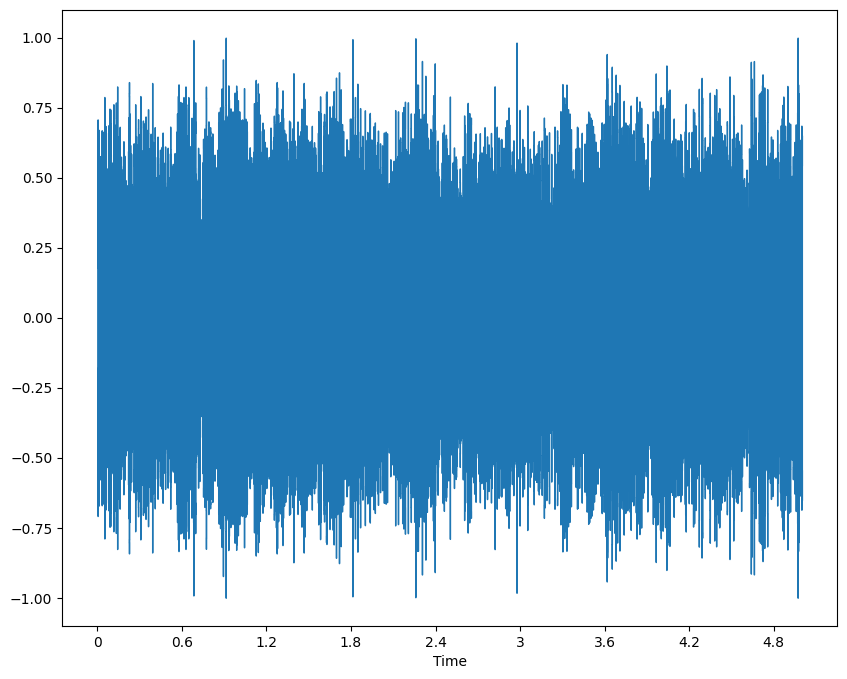

In [ ]:
#to print wave from one of them
import matplotlib.pyplot as plt
import librosa

new_path=('/content/drive/MyDrive/music7/rock')

one_sound=os.listdir(new_path)[0]
sound_path=os.path.join(new_path,one_sound)
y,sr=librosa.load(sound_path,duration=5)



import matplotlib.pyplot as plt
import librosa

plt.figure(figsize=(10,8))
librosa.display.waveshow(y,sr=sr)















In [ ]:
#let plot one from blues

genre=('/content/drive/MyDrive/music7/blues')

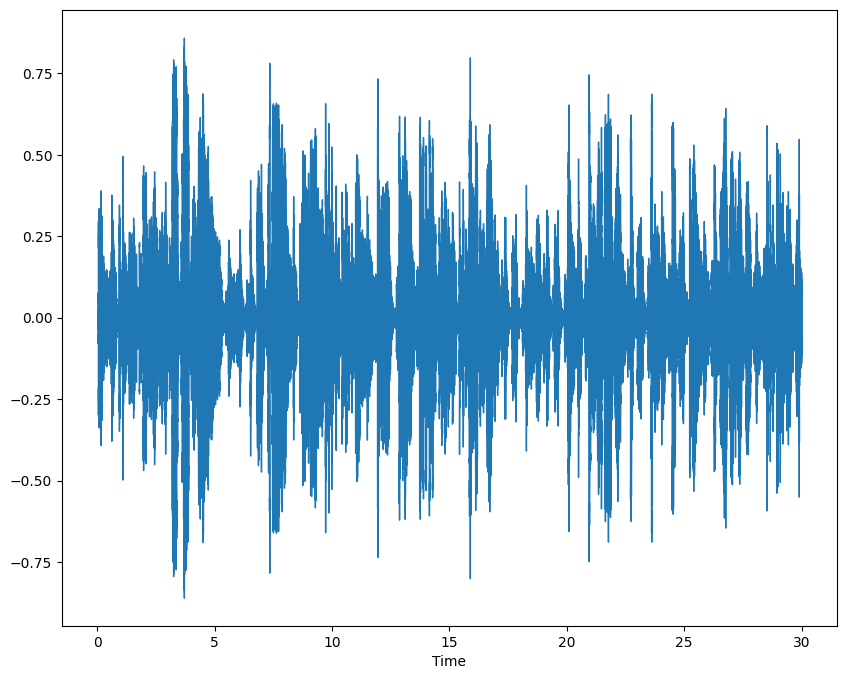

In [ ]:
blue_sound=os.listdir(genre)[0]
blue_path=os.path.join(genre,blue_sound)
y,sr=librosa.load(blue_path)
plt.figure(figsize=(10,8))
librosa.display.waveshow(y,sr=sr)

In [ ]:



music_path=('/content/drive/MyDrive/music7')

for genre in os.listdir(music_path):
  music=os.path.join(music_path,genre)
  if os.path.isdir(music):#single forder
    print(genre)








reggae
country
hiphop
rock
blues
jazz
metal
disco
pop
classical


In [ ]:
from genericpath import isdir
import os
import numpy as np
X = []
Y = []


for genre in os.listdir(music_path):
  genre_path=os.path.join(music_path,genre)

  if os.path.isdir(genre_path):
    for sound in os.listdir(genre_path):
      sound_path=os.path.join(genre_path,sound)

      try:
        y_audio,sr=librosa.load(sound_path,duration=10.0)

        #mfccs

        mfccs=librosa.feature.mfcc(y=y_audio,sr=sr,n_mfcc=20)

        #mfcc one vector

        mfccs_mean=np.mean(mfccs.T,axis=0)
        X.append(mfccs)
        Y.append(genre)

      except:
        print('no')






















/tmp/ipython-input-1021960535.py:16: UserWarning: PySoundFile failed. Trying audioread instead.
  y_audio,sr=librosa.load(sound_path,duration=20)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


no


In [ ]:
X = np.array(X)
Y = np.array(Y)

print("✅ Feature extraction complete!")
print("X shape:", X.shape)
print("Y shape:", Y.shape)


✅ Feature extraction complete!
X shape: (999, 20, 862)
Y shape: (999,)


In [ ]:
from re import template
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

Y_encoder=le.fit_transform(Y)






X_train,X_valid,Y_train,Y_valid=train_test_split(X,Y_hot,test_size=0.2,stratify=Y_hot,random_state=42)







In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

n_mfcc = X.shape[1]
time_frames = X.shape[2]
num_classes = Y_hot.shape[1]

model=Sequential()

model.add(Conv2D(16,kernel_size=(3,3),input_shape=(n_mfcc,time_frames,1),activation='relu'))
model.add(MaxPooling2D(1,2))
model.add(Dropout(0.3))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(1,2))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Show model summary
model.summary()





/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 18, 862, 16)    │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 18, 862, 16)    │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 17, 861, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 17, 861, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 15, 861, 32)    │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 15, 861, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 860, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 860, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 385280)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │    12,328,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,331,146 (47.04 MB)

 Trainable params: 12,331,050 (47.04 MB)

 Non-trainable params: 96 (384.00 B)

In [ ]:
!pip install keras-layer-normalization
from keras_layer_normalization import LayerNormalization
from keras.layers import ELU, PReLU, LeakyReLU
from tensorflow.keras.optimizers import Adam

In [ ]:

model.compile(
    optimizer=Adam(learning_rate=0.01),  # How weights are updated
    loss='binary_crossentropy',          # How errors are measured
    metrics=['accuracy']                 # What to monitor
)


In [ ]:
batch_size = 64
epochs = 15
num_classes = 10

hist=model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.1144 - loss: 102.1691
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.0943 - loss: 0.6829
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.1154 - loss: 0.6013
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 97s 5s/step - accuracy: 0.0791 - loss: 0.5606
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.0943 - loss: 0.5256
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.0997 - loss: 0.4954
Epoch 7/15
 5/13 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.1243 - loss: 0.4737

In [ ]:
# Evaluate on training data
train_loss, train_acc = model.evaluate(X_train, Y_train, verbose=0)
print(f"Training Accuracy: {train_acc:.4f}")

# Evaluate on validation data
val_loss, val_acc = model.evaluate(X_valid, Y_valid, verbose=0)
print(f"Validation Accuracy: {val_acc:.4f}")


Training Accuracy: 0.1001
Validation Accuracy: 0.1000


In [ ]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)


X_train shape: (799, 20, 431)
Y_train shape: (799, 10)


In [ ]:
print("Unique values in Y_train (sum per row):", np.unique(Y_train.sum(axis=1)))



Unique values in Y_train (sum per row): [1.]
